In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
marketing = pd.read_csv('../data/marketing_cleaned.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

In [42]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0


In [43]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10037 non-null  bool          
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          10037 non-null  bool          
 12  channel_code         1856 non-null   float64       
 13  is_correct_lang      10037 non-

### Daily marketing reach by channel

How many users are seeing the marketing assets each day ?

In [44]:
daily_users = marketing.groupby('date_served')['user_id'].nunique()

In [45]:
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

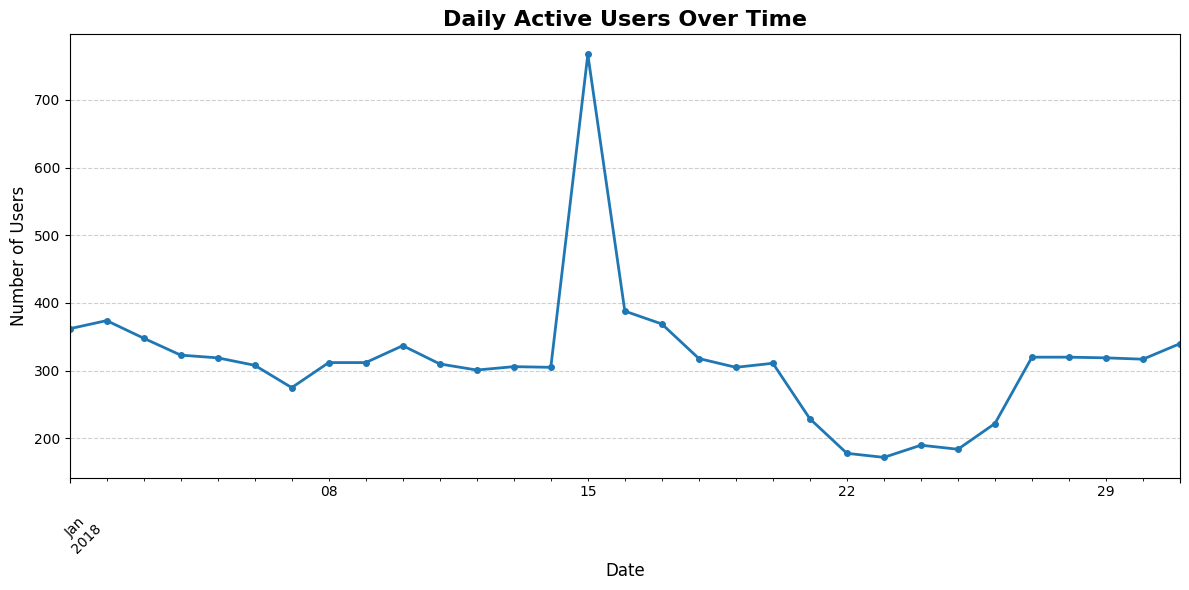

In [46]:
plt.figure(figsize=(12, 6))

daily_users.plot(
    linewidth=2,
    marker='o',
    markersize=4
)

plt.title('Daily Active Users Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

- User activity is generally stable with one major anomaly
- The mid-month spike should be investigated separately
- Short-term drops do not seem to affect long-term engagement

---

### Calculating the retension

On marketing teams, conversion rate is typically the most important metric. It is one of the best ways to determine how effective a marketing team was at gaining new customers.

In [47]:
# Number of people we marketed to
total = marketing['user_id'].nunique()

# Number of people who subscribed
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

conversion_rate = subscribers / total
print(round(conversion_rate*100, 2), "%")

13.89 %


Out of every 100 users who were targeted by the marketing campaign, approximately 14 users subscribed.

In [48]:
total_subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


### Customer Segmentation

In [54]:
subscribers = marketing[marketing['converted'] == True].groupby('subscribing_channel')['user_id'].nunique()
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [57]:
retained = marketing[marketing['is_retained'] == True].groupby('subscribing_channel')['user_id'].nunique()
print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [59]:
# Calculate the retention rate
channel_retention = (retained/subscribers)*100
print(round(channel_retention,2), "%")

subscribing_channel
Email        87.58
Facebook     68.78
House Ads    58.05
Instagram    68.10
Push         70.13
Name: user_id, dtype: float64 %


Look at the conversion rate by the language that the marketing asset was shown in. While many of your users speak English, some prefer another language. Let's check to make sure marketing material translated well across languages.

In [60]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


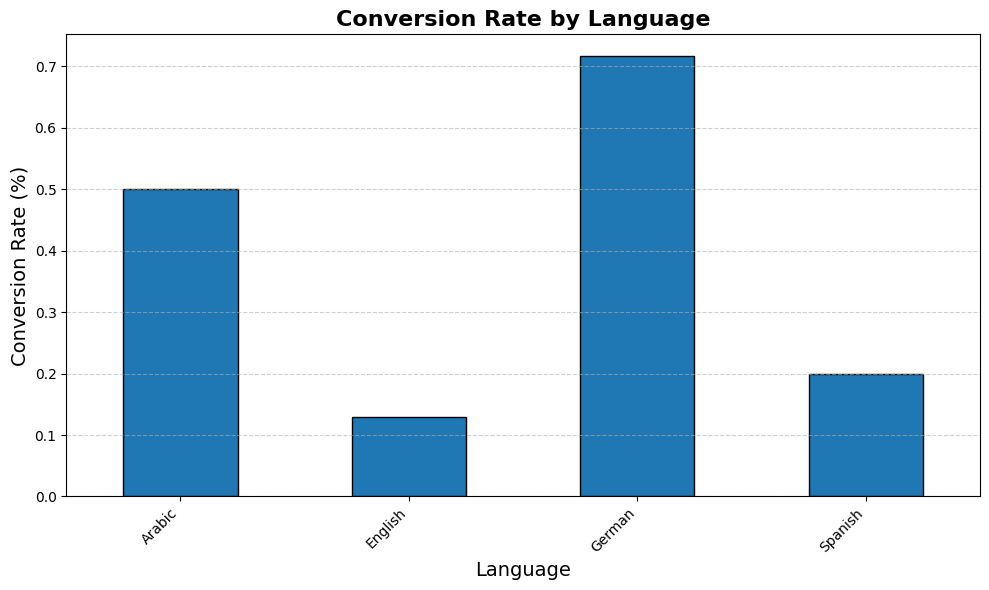

In [63]:
plt.figure(figsize=(10, 6))

language_conversion_rate.plot(
    kind='bar',
    edgecolor='black'
)

plt.title('Conversion Rate by Language', fontsize=16, fontweight='bold')
plt.xlabel('Language', fontsize=14)
plt.ylabel('Conversion Rate (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

This plot shows that German and Arabic speakers have much higher conversion rates than English and Spanish speakers.

---

The marketing team wants to know whether there is any difference in the conversion rate based on when in the month, your users saw an ad. 

In [61]:
total = marketing.groupby('date_served')['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted']==True].groupby('date_served')['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


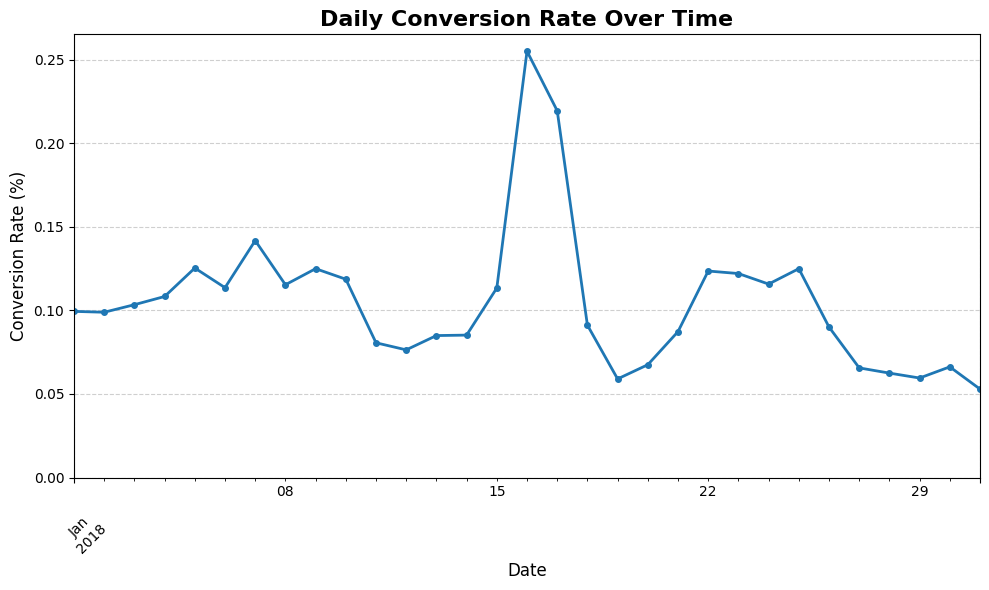

In [66]:
plt.figure(figsize=(10, 6))
daily_conversion_rate.plot(
    linewidth=2,
    marker='o',
    markersize=4
)

plt.title('Daily Conversion Rate Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0)
plt.tight_layout()
plt.show()

As we can see, the conversion rate is relatively steady except for one day in January.

---

To know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

In [67]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

In [68]:
channel_age

marketing_channel  age_group  
Email              0-18 years      93
                   19-24 years    111
                   24-30 years    120
                   30-36 years     60
                   36-45 years     63
                   45-55 years     65
                   55+ years       53
Facebook           0-18 years     264
                   19-24 years    347
                   24-30 years    296
                   30-36 years    249
                   36-45 years    226
                   45-55 years    299
                   55+ years      179
House Ads          0-18 years     694
                   19-24 years    761
                   24-30 years    681
                   30-36 years    699
                   36-45 years    589
                   45-55 years    678
                   55+ years      631
Instagram          0-18 years     300
                   19-24 years    315
                   24-30 years    286
                   30-36 years    259
                   

In [69]:
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))
channel_age_df

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


<Figure size 1200x700 with 0 Axes>

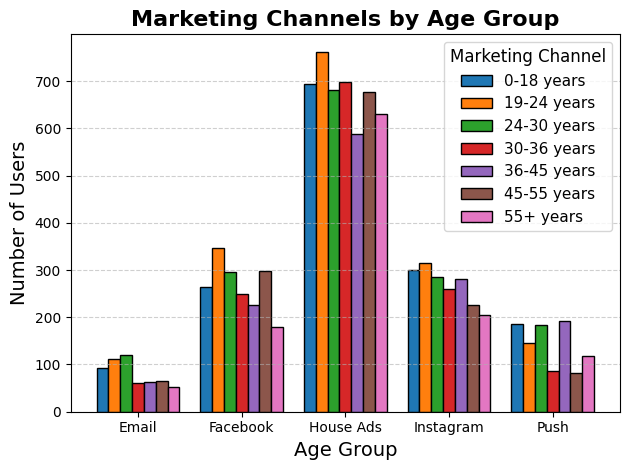

In [75]:
plt.figure(figsize=(12, 7))

ax = channel_age_df.plot(
    kind='bar',
    width=0.8,
    edgecolor='black'
)

plt.title('Marketing Channels by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(
    title='Marketing Channel',
    loc='upper right',
    fontsize=11,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

! As we can see, email is not reaching older age groups, and Facebook is not reaching many people under 18.

---

How many subscribers came from the campaign and how many of those subscribers have stayed on the service.

In [76]:
retention_total = marketing.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [78]:
# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


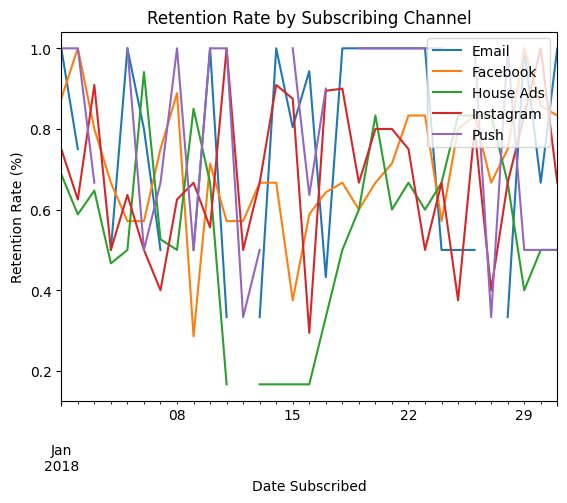

In [79]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

In [94]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45, ha='right')
        # Show plot
        plt.show()
        plt.clf()

In [87]:
def retention_rate(dataframe, column_names):
    retained = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Divide retained subscribers by total subscribers
    retention_rate = retained/converted
    return retention_rate


In [92]:
def conversion_rate(dataframe, column_names):
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    total = dataframe.groupby(column_names)['user_id'].nunique()

    # Divide retained subscribers by total subscribers
    conversion_rate = converted/total
    return conversion_rate

In [88]:
marketing['DoW'].value_counts()

DoW
1.0    386
2.0    352
0.0    306
3.0    226
4.0    199
6.0    196
5.0    191
Name: count, dtype: int64

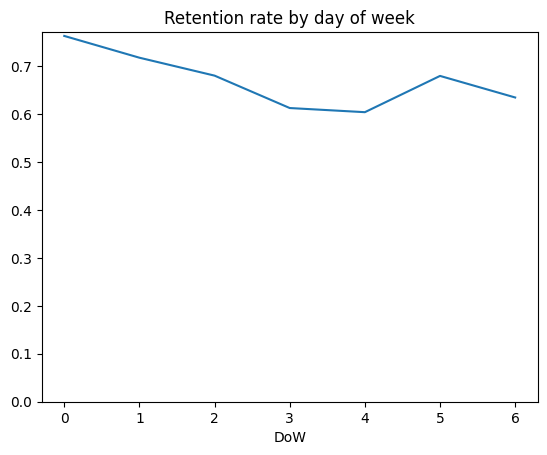

In [91]:
Dow_retention = retention_rate(marketing, ['DoW'])

Dow_retention.plot()
plt.title('Retention rate by day of week')
plt.ylim(0)
plt.show()

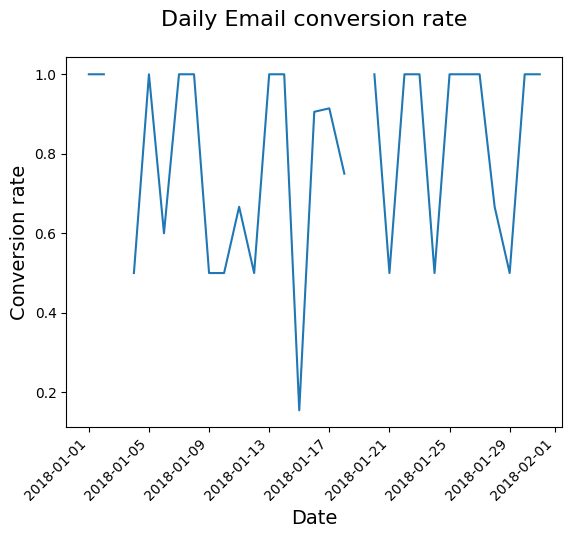

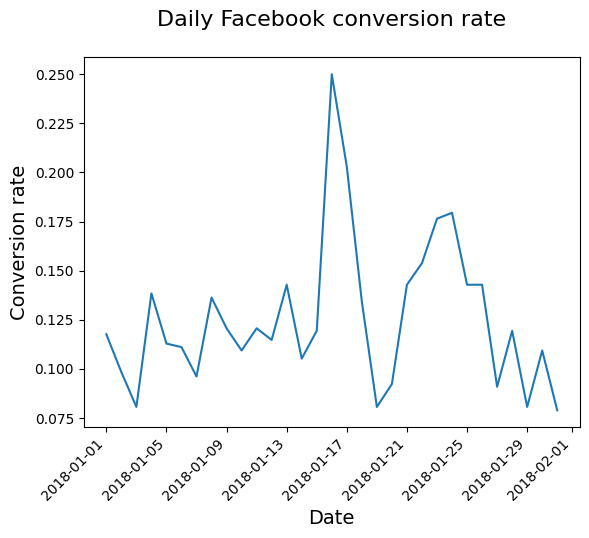

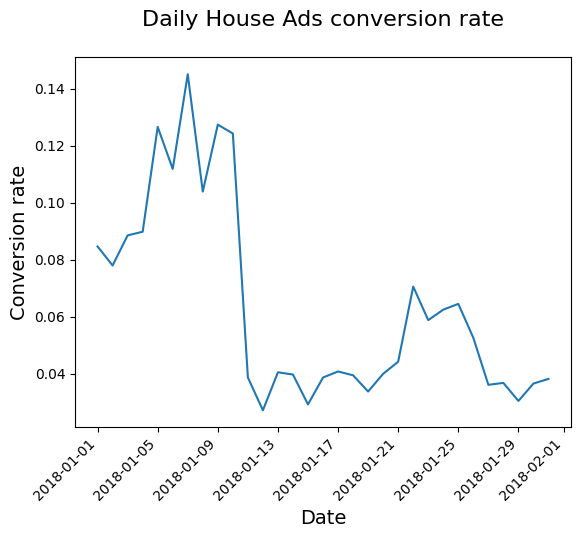

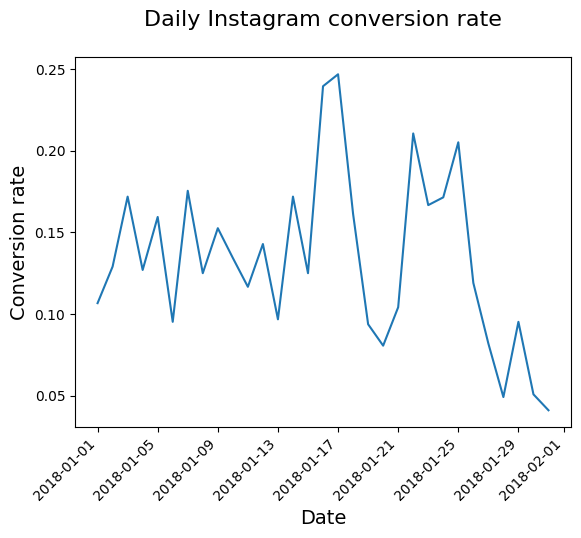

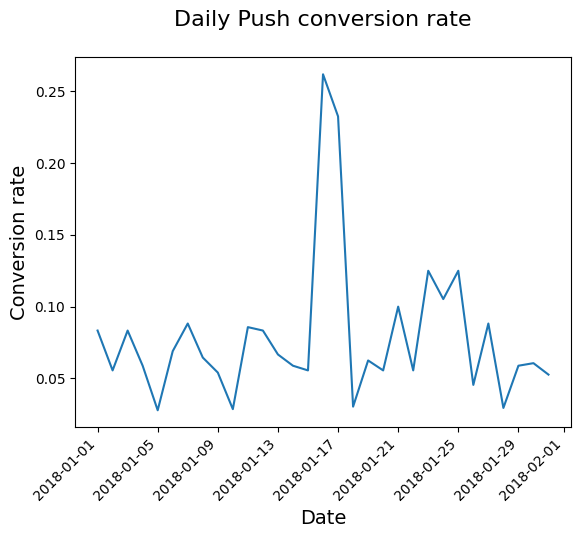

<Figure size 640x480 with 0 Axes>

In [95]:
daily_conv_channel = conversion_rate(marketing, ['date_served','marketing_channel'])
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))
plotting_conv(daily_conv_channel)


---

### Analysis of the sudden decrease in the conversion rate after 11 Jan 2018

![Daily ads conversion rate](../images//Daily_ads_conversion_rate.png)


we will begin by checking whether users are more likely to convert on weekends compared with weekdays and determine if that could be the cause for the changing house ads conversion rate.

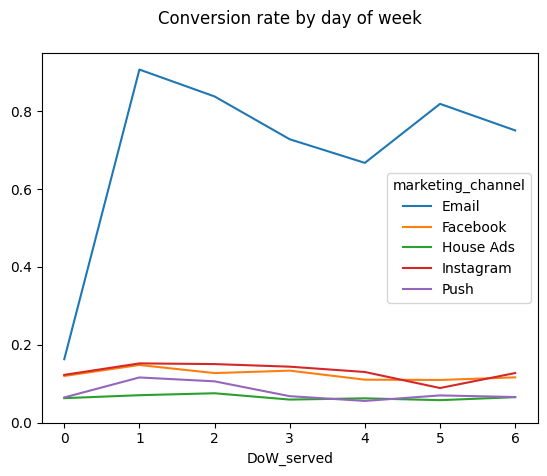

In [97]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

DoW_conversion = conversion_rate(marketing, ['DoW_served','marketing_channel'])

DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

Email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday. We will investigate further.

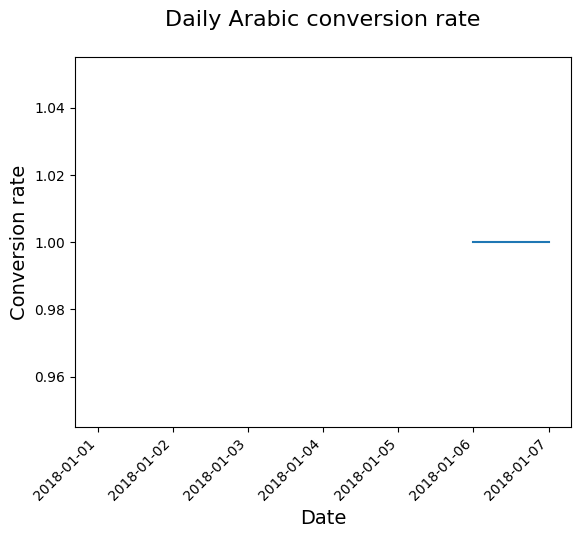

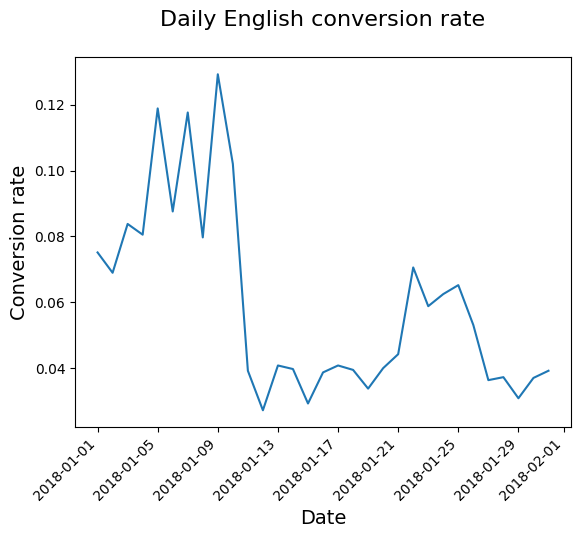

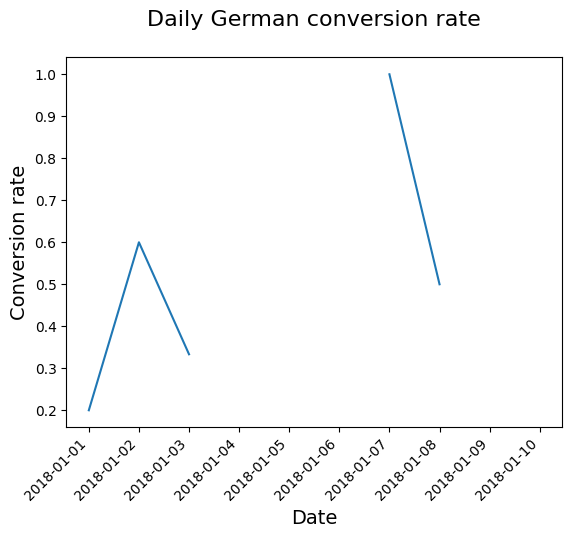

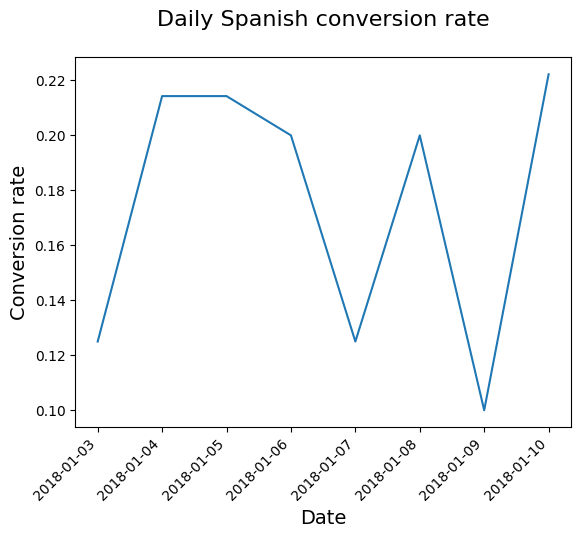

<Figure size 640x480 with 0 Axes>

In [98]:
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']
# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served','language_displayed'])

conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

plotting_conv(conv_lang_df)

The English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. You will investigate further.

---

In [99]:

house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()


language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


C:\Users\sapan\AppData\Local\Temp\ipykernel_21516\1251499469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. We will investigate further.

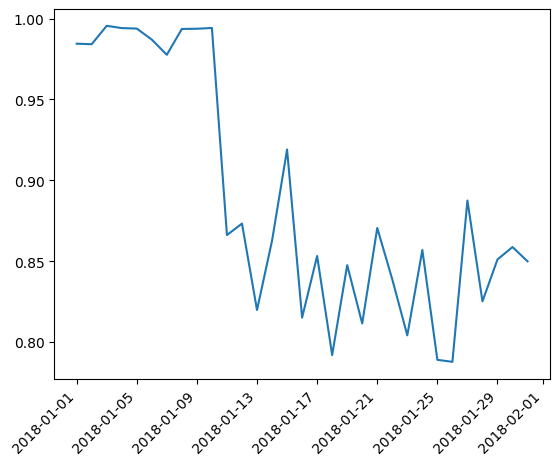

In [101]:
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation=45, ha='right')

plt.show()

It shown that house ads have been underperforming due to serving all ads in English rather than each user's preferred language

---

We've determined that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In [102]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [103]:
converted = house_ads.groupby(['date_served', 'language_preferred']).agg({'user_id':'nunique','converted':'sum'})
converted_df = pd.DataFrame(converted.unstack(level=1))

In [104]:
converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   
2018-01-06             3.0   136.0    2.0    11.0       3.0    12.0    0.0   
2018-01-07             2.0   117.0    2.0    10.0       2.0    14.0    2.0   
2018-01-08             NaN   138.0    6.0    10.0       NaN    11.0    3.0   
2018-01-09             NaN   147.0    NaN    10.0       NaN    19.0    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN    15.0    2.0   
2018-01-11             7.0   133.0    2.0    13.0       0.0     6.0    0.0   
2018-01-12             3.0   129.0    4.0    11.0       0.0     3.0    0.0   
2018-01-13             6.0   121.0    5.0    16.0       0.0     5.0    1.0   
2018-01-14             5.0   131.0    3.0    12.0       0.0     6.0    0.0   
2018-01-15             2.0   189.0    4.0    10.0       0.0     6.0    0.0   
2018-01-16             7.0   127.0    4.0    17.0       0.0     6.0    0.0   
2018-01-17             2.0   126.0    3.0    16.0       0.0     2.0    0.0   
2018-01-18             7.0   121.0    6.0    18.0       0.0     5.0    1.0   
2018-01-19             5.0   126.0    5.0    12.0       1.0     4.0    0.0   
2018-01-20             6.0   124.0    6.0    14.0       1.0     4.0    1.0   
2018-01-21             1.0    99.0    4.0     9.0       0.0     5.0    0.0   
2018-01-22             2.0    72.0    3.0     8.0       1.0     4.0    1.0   
2018-01-23             3.0    69.0    4.0     9.0       0.0     5.0    0.0   
2018-01-24             2.0    83.0    3.0     8.0       0.0     6.0    0.0   
2018-01-25             3.0    75.0    4.0    11.0       0.0     4.0    2.0   
2018-01-26             6.0    89.0    3.0    16.0       0.0     4.0    0.0   
2018-01-27             3.0   148.0    3.0    12.0       1.0     4.0    0.0   
2018-01-28             5.0   134.0    3.0    21.0       0.0     4.0    0.0   
2018-01-29             7.0   138.0    4.0    15.0       2.0     3.0    0.0   
2018-01-30             4.0   139.0    3.0    18.0       0.0     4.0    0.0   
2018-01-31             7.0   130.0    4.0    16.0       1.0     4.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0  
2018-01-03             1.0  
2018-01-04             3.0  
2018-01-05             3.0  
2018-01-06             2.0  
2018-01-07             1.0  
2018-01-08             2.0  
2018-01-09             1.0  
2018-01-10             4.0  
2018-01-11             0.0  
2018-01-12             1.0  
2018-01-13             0.0  
2018-01-14             0.0  
2018-01-15             0.0  
2018-01-16             0.0  
2018-01-17             4.0  
2018-01-18             0.0  
2018-01-19             0.0  
2018-01-20             0.0  
2018-01-21             0.0  
2018-01-22             0.0  
2018-01-23             0.0  
2018-01-24             0.0  
2018-01-25             0.0  
2018-01-26             2.0  
2018-01-27             1.0  
2018-01-28             2.0  
2018-01-29             0.0  
2018-01-30             2.0  
2018-01-31             1.0

In [107]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]/converted_df.loc['2018-01-11':'2018-01-31'][('user_id','English')]


In [108]:
converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   
2018-01-06             3.0   136.0    2.0    11.0       3.0    12.0    0.0   
2018-01-07             2.0   117.0    2.0    10.0       2.0    14.0    2.0   
2018-01-08             NaN   138.0    6.0    10.0       NaN    11.0    3.0   
2018-01-09             NaN   147.0    NaN    10.0       NaN    19.0    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN    15.0    2.0   
2018-01-11             7.0   133.0    2.0    13.0       0.0     6.0    0.0   
2018-01-12             3.0   129.0    4.0    11.0       0.0     3.0    0.0   
2018-01-13             6.0   121.0    5.0    16.0       0.0     5.0    1.0   
2018-01-14             5.0   131.0    3.0    12.0       0.0     6.0    0.0   
2018-01-15             2.0   189.0    4.0    10.0       0.0     6.0    0.0   
2018-01-16             7.0   127.0    4.0    17.0       0.0     6.0    0.0   
2018-01-17             2.0   126.0    3.0    16.0       0.0     2.0    0.0   
2018-01-18             7.0   121.0    6.0    18.0       0.0     5.0    1.0   
2018-01-19             5.0   126.0    5.0    12.0       1.0     4.0    0.0   
2018-01-20             6.0   124.0    6.0    14.0       1.0     4.0    1.0   
2018-01-21             1.0    99.0    4.0     9.0       0.0     5.0    0.0   
2018-01-22             2.0    72.0    3.0     8.0       1.0     4.0    1.0   
2018-01-23             3.0    69.0    4.0     9.0       0.0     5.0    0.0   
2018-01-24             2.0    83.0    3.0     8.0       0.0     6.0    0.0   
2018-01-25             3.0    75.0    4.0    11.0       0.0     4.0    2.0   
2018-01-26             6.0    89.0    3.0    16.0       0.0     4.0    0.0   
2018-01-27             3.0   148.0    3.0    12.0       1.0     4.0    0.0   
2018-01-28             5.0   134.0    3.0    21.0       0.0     4.0    0.0   
2018-01-29             7.0   138.0    4.0    15.0       2.0     3.0    0.0   
2018-01-30             4.0   139.0    3.0    18.0       0.0     4.0    0.0   
2018-01-31             7.0   130.0    4.0    16.0       1.0     4.0    0.0   

                           english_conv_rate  
language_preferred Spanish                    
date_served                                   
2018-01-01             0.0               NaN  
2018-01-02             0.0               NaN  
2018-01-03             1.0               NaN  
2018-01-04             3.0               NaN  
2018-01-05             3.0               NaN  
2018-01-06             2.0               NaN  
2018-01-07             1.0               NaN  
2018-01-08             2.0               NaN  
2018-01-09             1.0               NaN  
2018-01-10             4.0               NaN  
2018-01-11             0.0          0.045113  
2018-01-12             1.0          0.023256  
2018-01-13             0.0          0.041322  
2018-01-14             0.0          0.045802  
2018-01-15             0.0          0.031746  
2018-01-16             0.0          0.047244  
2018-01-17             4.0          0.015873  
2018-01-18             0.0          0.041322  
2018-01-19             0.0          0.031746  
2018-01-20             0.0          0.032258  
2018-01-21             0.0          0.050505  
2018-01-22             0.0          0.055556  
2018-01-23             0.0          0.072464  
2018-01-24             0.0          0.072289  
2018-01-25             0.0          0.053333  
2018-01-26             2.0          0.044944  
201

In [109]:
# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted_df['expected_german_conv'] = converted_df['expected_german_rate']/100*converted_df[('user_id','German')]

In [110]:
converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   
2018-01-06             3.0   136.0    2.0    11.0       3.0    12.0    0.0   
2018-01-07             2.0   117.0    2.0    10.0       2.0    14.0    2.0   
2018-01-08             NaN   138.0    6.0    10.0       NaN    11.0    3.0   
2018-01-09             NaN   147.0    NaN    10.0       NaN    19.0    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN    15.0    2.0   
2018-01-11             7.0   133.0    2.0    13.0       0.0     6.0    0.0   
2018-01-12             3.0   129.0    4.0    11.0       0.0     3.0    0.0   
2018-01-13             6.0   121.0    5.0    16.0       0.0     5.0    1.0   
2018-01-14             5.0   131.0    3.0    12.0       0.0     6.0    0.0   
2018-01-15             2.0   189.0    4.0    10.0       0.0     6.0    0.0   
2018-01-16             7.0   127.0    4.0    17.0       0.0     6.0    0.0   
2018-01-17             2.0   126.0    3.0    16.0       0.0     2.0    0.0   
2018-01-18             7.0   121.0    6.0    18.0       0.0     5.0    1.0   
2018-01-19             5.0   126.0    5.0    12.0       1.0     4.0    0.0   
2018-01-20             6.0   124.0    6.0    14.0       1.0     4.0    1.0   
2018-01-21             1.0    99.0    4.0     9.0       0.0     5.0    0.0   
2018-01-22             2.0    72.0    3.0     8.0       1.0     4.0    1.0   
2018-01-23             3.0    69.0    4.0     9.0       0.0     5.0    0.0   
2018-01-24             2.0    83.0    3.0     8.0       0.0     6.0    0.0   
2018-01-25             3.0    75.0    4.0    11.0       0.0     4.0    2.0   
2018-01-26             6.0    89.0    3.0    16.0       0.0     4.0    0.0   
2018-01-27             3.0   148.0    3.0    12.0       1.0     4.0    0.0   
2018-01-28             5.0   134.0    3.0    21.0       0.0     4.0    0.0   
2018-01-29             7.0   138.0    4.0    15.0       2.0     3.0    0.0   
2018-01-30             4.0   139.0    3.0    18.0       0.0     4.0    0.0   
2018-01-31             7.0   130.0    4.0    16.0       1.0     4.0    0.0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-01             0.0               NaN                   NaN   
2018-01-02             0.0               NaN                   NaN   
2018-01-03             1.0               NaN                   NaN   
2018-01-04             3.0               NaN                   NaN   
2018-01-05             3.0               NaN                   NaN   
2018-01-06             2.0               NaN                   NaN   
2018-01-07             1.0               NaN                   NaN   
2018-01-08             2.0               NaN                   NaN   
2018-01-09             1.0               NaN                   NaN   
2018-01-10             4.0               NaN                   NaN   
2018-01-11             0.0          0.045113              0.075876   
2018-01-12             1.0          0.023256              0.039115   
2018-01-13             0.0          0.041322              0.069501   
2018-01-14             0.0          0.045802              0.077035   
2018-01-15             0.0          0.031746              0.053394   
2018-01-16             0.0          0.047244              0.079461   
2018-01-17             4.0          

Time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language

In [111]:
# Use .loc to slice only the relevant dates
converted = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

-25.495425075261792


25 subscribers may not seem like many, but for a small company this can be vitally important, especially when expanding to new markets

## A/B testing

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

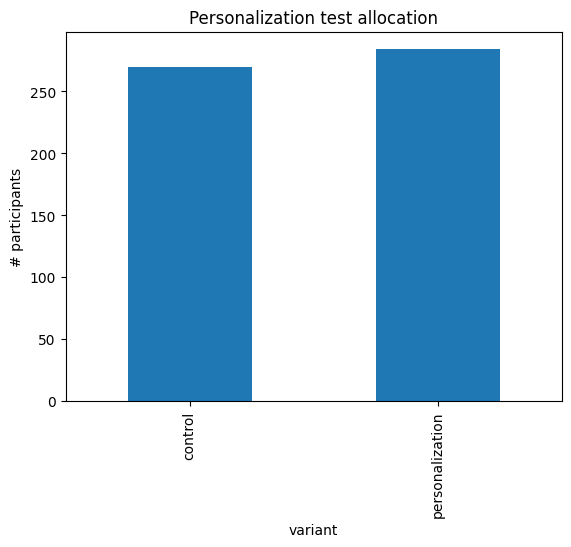

In [112]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

There's a slight difference in allocation, but it's within the expected range so we can continue with our analysis.

In [113]:

subscribers = email.groupby(['user_id',  'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


We see that personalization converted users at a higher rate than the control. Next, you will build a lift function to quantify by how much

----

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:

 

The result is the percent difference between the control and treatment.

In [ ]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


 As you can see, there's a large lift, but are your results statistically significant? We will find out.

In [123]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Number of conversions in each group
successes = np.array([
    control.sum(),
    personalization.sum()
])

# Total users in each group
observations = np.array([
    len(control),
    len(personalization)
])

# Run the z-test
z_stat, p_value = proportions_ztest(successes, observations)

print("Z-statistic:", round(z_stat, 3))
print("P-value:", round(p_value, 4))


Z-statistic: -2.721
P-value: 0.0065


the results are statistically significant with p = 0.006.

We  observed that your personalization experiment is highly statistically significant. However, when running experiments, it is important to check how new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others.

In [134]:
def ab_segmentation(segment):
    # Loop through each segment value
    for subsegment in np.unique(marketing[segment].dropna()):
        print(f"\nSegment: {segment} = {subsegment}")
        
        # Filter to Email channel and current subsegment
        email = marketing[
            (marketing['marketing_channel'] == 'Email') &
            (marketing[segment] == subsegment)
        ]

        # Aggregate conversions per user per variant
        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = subscribers.unstack(level=1)

        # Drop users not exposed to each variant
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()

        # Safety check
        if len(control) == 0 or len(personalization) == 0:
            print("Not enough data for this segment.")
            continue

        # Conversion rates
        control_rate = control.mean()
        personalization_rate = personalization.mean()

        # Lift (STRING output)
        segment_lift = lift(control, personalization)

        # Two-proportion z-test
        successes = np.array([control.sum(), personalization.sum()])
        observations = np.array([len(control), len(personalization)])

        z_stat, p_value = proportions_ztest(successes, observations)

        # Output
        print(f"Control conversion rate: {control_rate:.3f}")
        print(f"Personalization conversion rate: {personalization_rate:.3f}")
        print(f"Lift: {segment_lift}")
        print(f"Z-statistic: {z_stat:.3f}")
        print(f"P-value: {p_value:.4f}")


In [135]:
ab_segmentation('language_displayed')


Segment: language_displayed = Arabic
Control conversion rate: 0.400
Personalization conversion rate: 0.600
Lift: 50.0%
Z-statistic: -0.632
P-value: 0.5271

Segment: language_displayed = English
Control conversion rate: 0.229
Personalization conversion rate: 0.319
Lift: 39.0%
Z-statistic: -2.212
P-value: 0.0270

Segment: language_displayed = German
Control conversion rate: 0.941
Personalization conversion rate: 0.926
Lift: -1.62%
Z-statistic: 0.195
P-value: 0.8451

Segment: language_displayed = Spanish
Control conversion rate: 0.375
Personalization conversion rate: 1.000
Lift: 166.67%
Z-statistic: -2.070
P-value: 0.0384


In [136]:
ab_segmentation('age_group')


Segment: age_group = 0-18 years
Control conversion rate: 0.244
Personalization conversion rate: 0.540
Lift: 121.4%
Z-statistic: -2.861
P-value: 0.0042

Segment: age_group = 19-24 years
Control conversion rate: 0.275
Personalization conversion rate: 0.567
Lift: 106.24%
Z-statistic: -2.935
P-value: 0.0033

Segment: age_group = 24-30 years
Control conversion rate: 0.220
Personalization conversion rate: 0.573
Lift: 161.19%
Z-statistic: -3.663
P-value: 0.0002

Segment: age_group = 30-36 years
Control conversion rate: 0.333
Personalization conversion rate: 0.000
Lift: -100.0%
Z-statistic: 2.989
P-value: 0.0028

Segment: age_group = 36-45 years
Control conversion rate: 0.282
Personalization conversion rate: 0.042
Lift: -85.23%
Z-statistic: 2.360
P-value: 0.0183

Segment: age_group = 45-55 years
Control conversion rate: 0.300
Personalization conversion rate: 0.083
Lift: -72.22%
Z-statistic: 2.030
P-value: 0.0424

Segment: age_group = 55+ years
Control conversion rate: 0.333
Personalization co

We found that personalization was extremely effective for __`younger groups`__ but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.